<h1>Data Exploration</h1>

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression

<h1>(1): Feature Engineering</h1>
<h3>Log volume variables to account for wide range</h3>

In [2]:
df = pd.read_csv('main.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df['log_volume'] = np.log1p(df['volume'])

<h1>(2): Return Analysis</h1>

count    133591.000000
mean          0.001514
std           0.033824
min          -0.584800
25%          -0.011000
50%           0.000000
75%           0.012900
max           0.625700
Name: return_target, dtype: float64


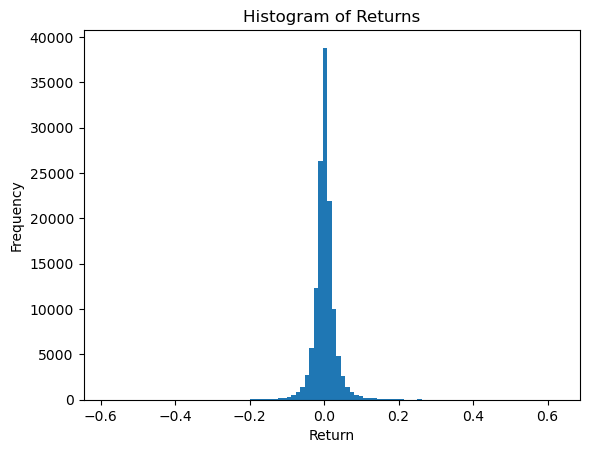

In [3]:
print(df['return_target'].describe())
plt.hist(df['return_target'],bins=100)
plt.title('Histogram of Returns')
plt.ylabel('Frequency')
plt.xlabel('Return')
plt.show()

<h1>(3): Feature relationships with target_return</h1>

In [5]:
#Single Variable Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

reg_dict = {}
for col in ['1d_return','1d_intraday_return', '1d_afterhours_return','2d_return', '3d_return', '4d_return', '5d_return', '6d_return','7d_return', '8d_return', '9d_return', 
            '10d_return', '15d_return','20d_return', '2h_return', '1h_return', 'spy_1d_return','log_volume']:
    featdf = df[[col,'return_target']].dropna()
    x = featdf[[col]]
    y = featdf['return_target']
    y_pred = LinearRegression().fit(x, y).predict(x)
    preds = y.to_frame('ymove').assign(predicted=y_pred)
    rmse = np.sqrt(mean_squared_error(preds['predicted'], preds['ymove'])) #rmse
    pvalue = round(sm.OLS(y, sm.add_constant(x)).fit().pvalues[1],6) #pvalue
    r2 = r2_score(y, y_pred) #r^2
    reg_dict[col] = {'rmse':rmse,'p-value':pvalue,'r2':r2}
pd.DataFrame(reg_dict).T

,rmse,p-value,r2
1d_return,0.032933,0.000000,0.000920
1d_intraday_return,0.033040,0.000000,0.000392
1d_afterhours_return,0.033353,0.000000,0.000278
2d_return,0.033497,0.000000,0.001167
3d_return,0.033242,0.000000,0.001143
4d_return,0.033199,0.000000,0.001385
5d_return,0.033153,0.000000,0.001008
6d_return,0.033210,0.000000,0.001670
7d_return,0.033132,0.000000,0.001966
8d_return,0.033086,0.000000,0.001357


In [8]:
#Mutual Information Scores (x=indp vars, y=return target)
print('Mutual Information Scores')
for feat in ['1d_return','1d_intraday_return', '1d_afterhours_return','2d_return', '3d_return', '4d_return', '5d_return', '6d_return','7d_return', '8d_return', '9d_return', 
              '10d_return', '15d_return','20d_return', '2h_return', '1h_return', 'spy_1d_return','log_volume']:
    featdf = df[[feat,'return_target']].dropna()
    x = featdf[[feat]]
    y = featdf['return_target']
    print(f'{feat}: {round(float(mutual_info_regression(x, y)),4)}')

Mutual Information Scores
1d_return: 0.0857
1d_intraday_return: 0.0704
1d_afterhours_return: 0.062
2d_return: 0.0555
3d_return: 0.046
4d_return: 0.0445
5d_return: 0.0424
6d_return: 0.0393
7d_return: 0.043
8d_return: 0.0407
9d_return: 0.0287
10d_return: 0.0279
15d_return: 0.0273
20d_return: 0.0219
2h_return: 0.0891
1h_return: 0.1075
spy_1d_return: 0.2072
log_volume: 0.0083


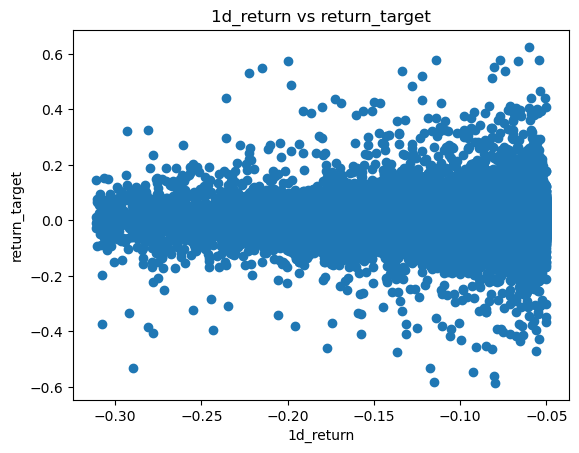

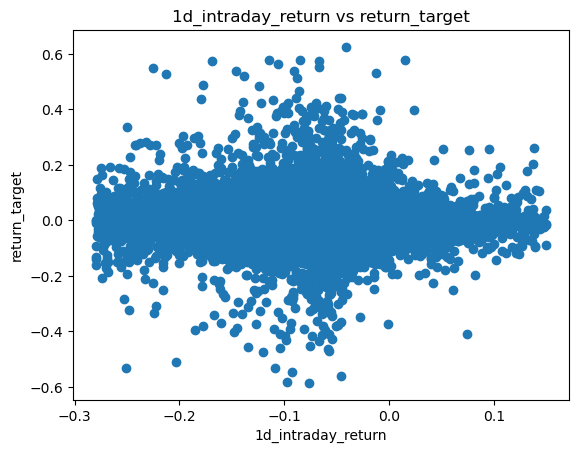

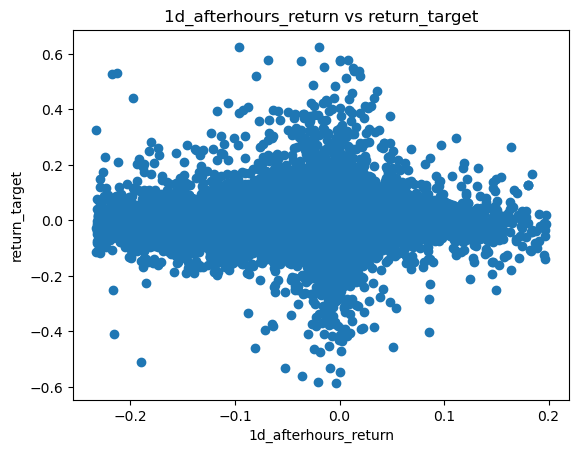

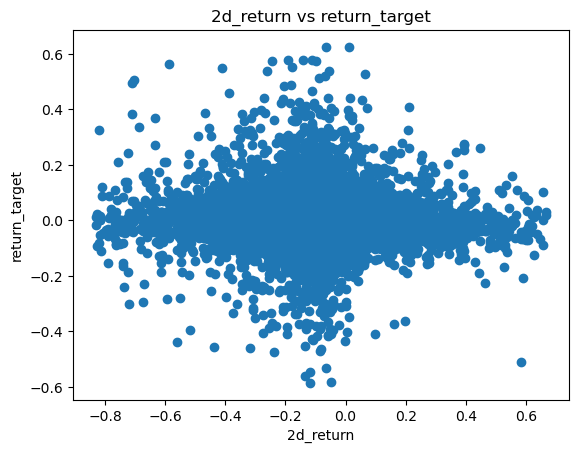

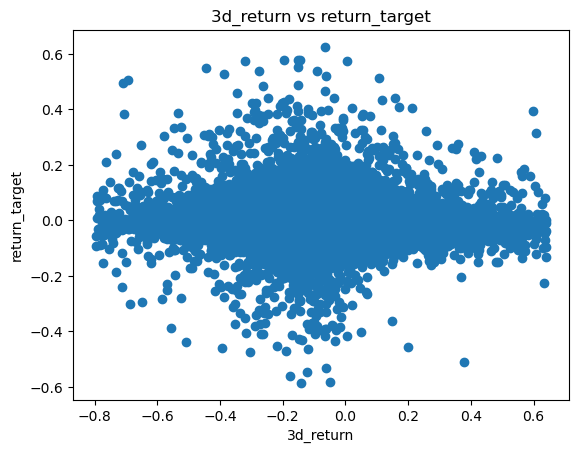

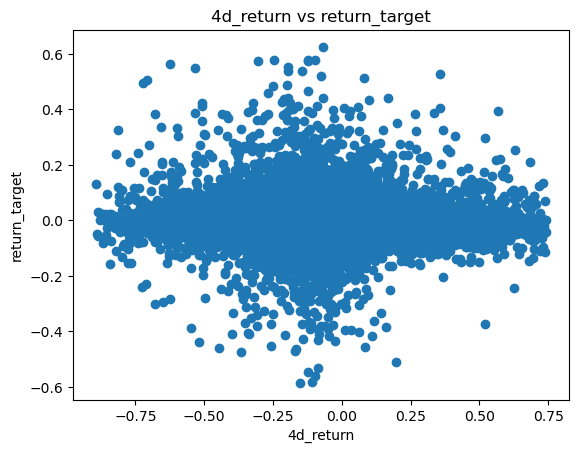

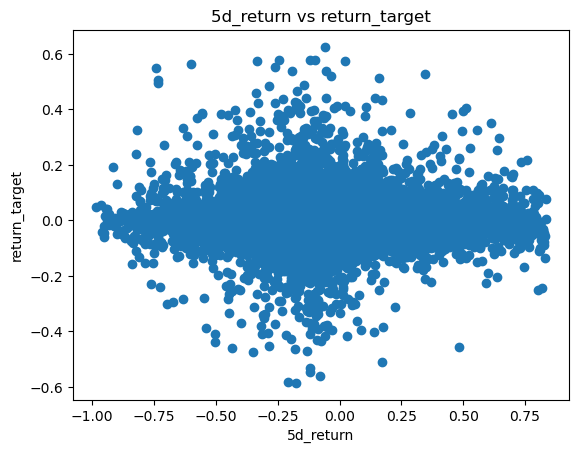

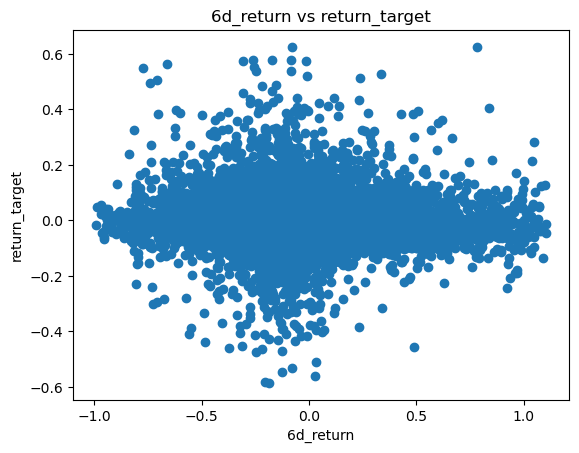

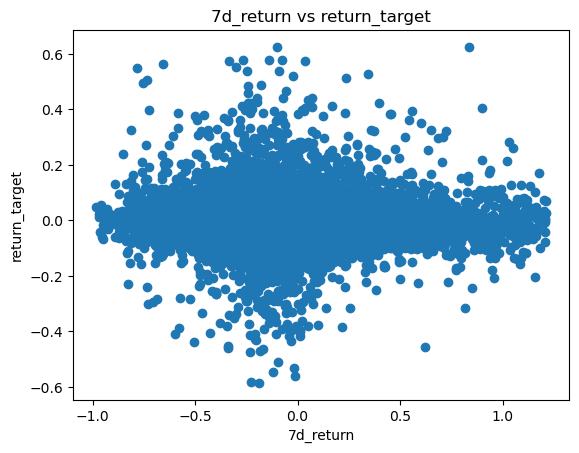

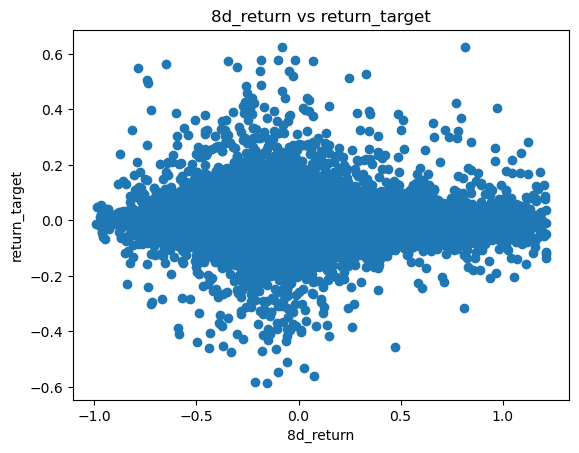

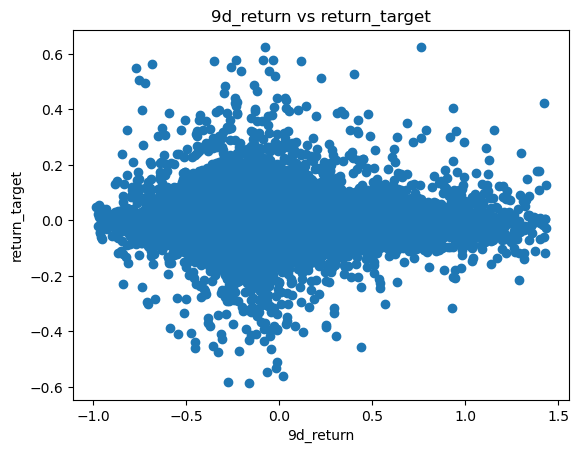

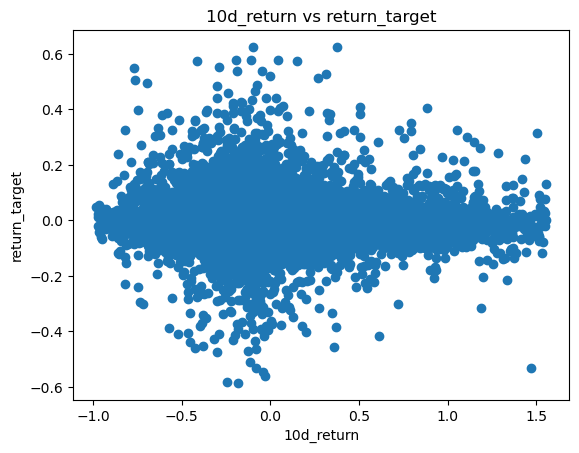

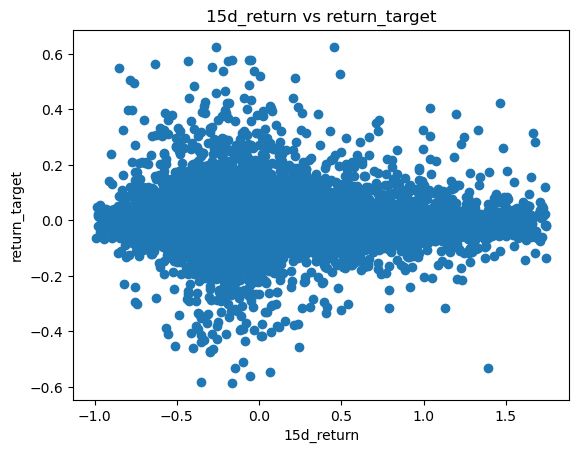

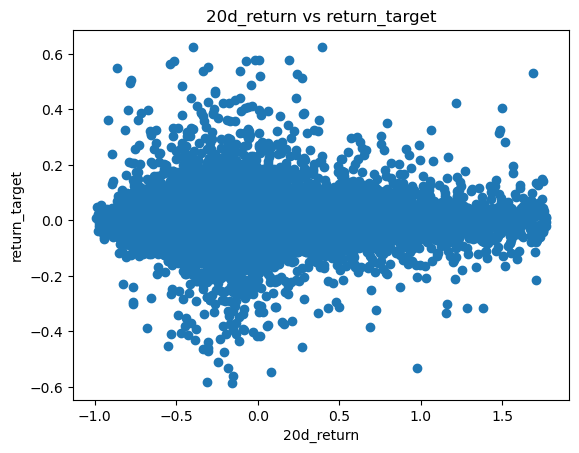

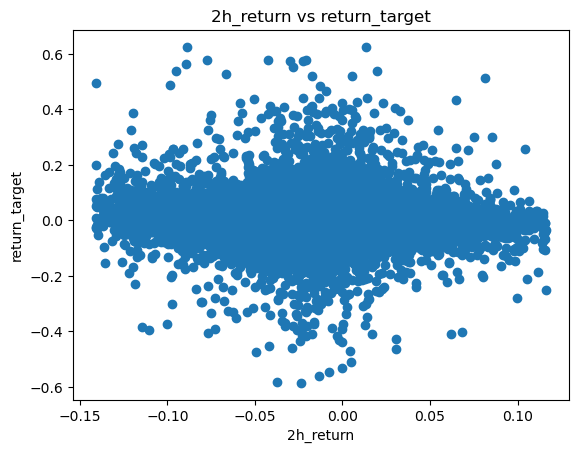

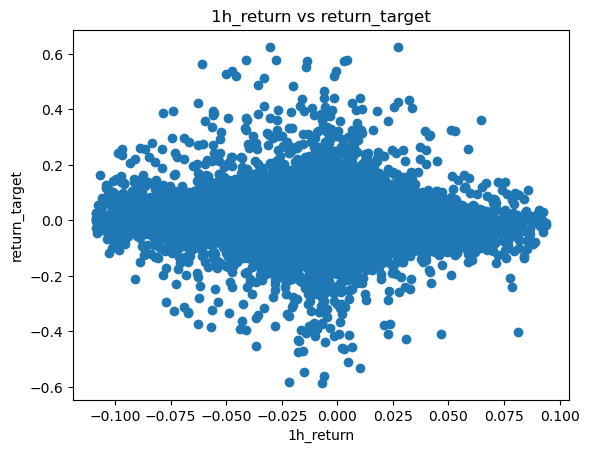

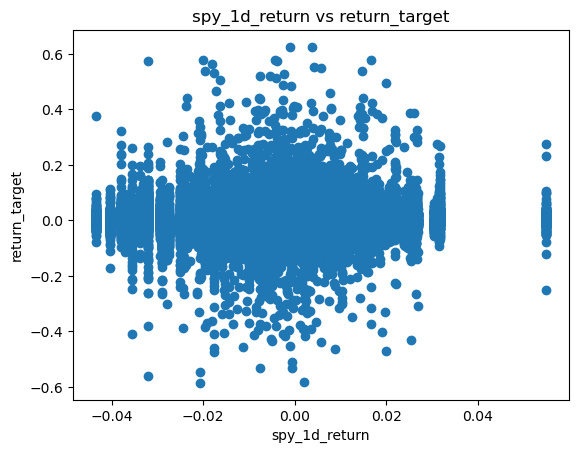

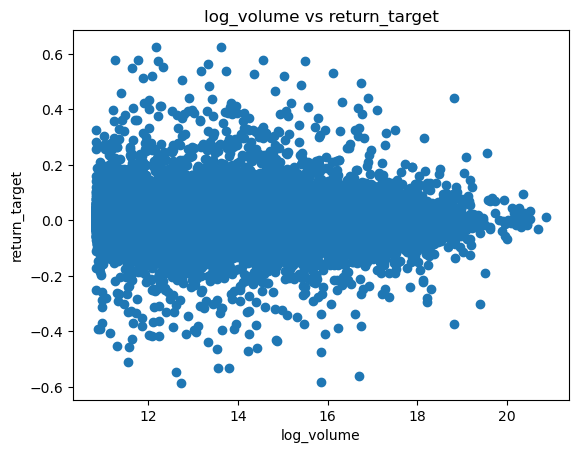

In [9]:
#Scatterplots
for feat in ['1d_return','1d_intraday_return', '1d_afterhours_return','2d_return', '3d_return', '4d_return', '5d_return', '6d_return','7d_return', '8d_return', '9d_return', 
              '10d_return', '15d_return','20d_return', '2h_return', '1h_return', 'spy_1d_return','log_volume']:
    featdf = df[[feat,'return_target']].dropna()
    x = featdf[[feat]]
    y = featdf['return_target']
    plt.scatter(x,y)
    plt.title(f'{feat} vs return_target')
    plt.xlabel(feat)
    plt.ylabel('return_target')
    plt.show()

In [58]:
df.to_csv('main.csv')

<h1>Conclusions</h1>
<h3>No valuable relationships in data, moving to multivariable linear regression as exploration/data mining method</h4>